<a href="https://colab.research.google.com/github/socratesjnr/asuu-strike-project/blob/main/student_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Barplot of the students distribution in the university. Compare to the distribution of form dataset.
                                                 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
                  
student_distribution={'faculty':['Arts', 'Basic Medical Sciences',
                                 'Clincal Sciences', 'Dental Sciences',
                                 'Education', 'Engineering', 
                                 'Environmental Sciences', 'Law', 
                                 'Management Sciences', 'Pharmacy', 
                                 'Science', 'Social Sciences'],
                      'student_dist':[3750, 520, 1900, 510, 6900, 3600, 
                                       1300, 1900, 4300, 900, 5300, 3600]}
student_dist=pd.DataFrame(student_distribution)
student_dist.set_index('faculty',inplace=True)

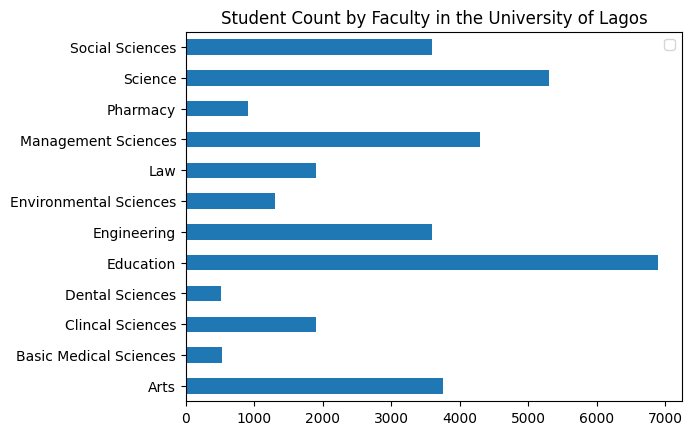

In [28]:
student_dist.plot(kind='barh', xlabel='',
                   title='Student Count by Faculty in the University of Lagos')
plt.legend('')

,student_dist
faculty,
Arts,10.875870
Basic Medical Sciences,1.508121
Clincal Sciences,5.510441
Dental Sciences,1.479118
Education,20.011601
Engineering,10.440835
Environmental Sciences,3.770302
Law,5.510441
Management Sciences,12.470998


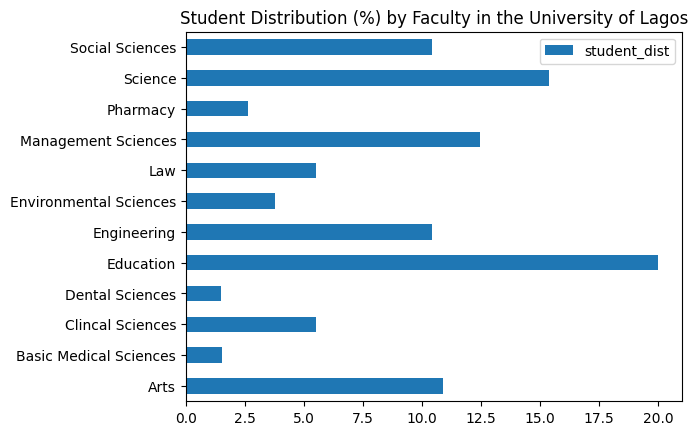

In [29]:
total_student_count = sum(student_dist['student_dist'])
perc_student_count = 100 * student_dist/total_student_count
# perc_student_count = perc_student_count.sort_values(ascending=True)

perc_student_count.plot(kind='barh', xlabel='', title='Student Distribution (%) by Faculty in the University of Lagos')
perc_student_count

## Sample Strata
This gives the minimum number of students we require from each faculty to ensure our data adequately represents the population.

### Minimum strata

In [30]:
from statsmodels.stats.proportion import samplesize_confint_proportion

# Set the desired confidence level and margin of error
conf_level = 0.95
margin_error = 0.05

# Estimate the proportion of affected students (for example, 0.5)
p = 0.5

# Calculate the required sample size
sample_size = samplesize_confint_proportion(p, margin_error, alpha=(1-conf_level))
print(f"The minimum required sample size is {int(sample_size)}")


The minimum required sample size is 384


In [31]:
minimum = sample_size
min_strata = round(perc_student_count*minimum/100)
min_strata

,student_dist
faculty,
Arts,42.0
Basic Medical Sciences,6.0
Clincal Sciences,21.0
Dental Sciences,6.0
Education,77.0
Engineering,40.0
Environmental Sciences,14.0
Law,21.0
Management Sciences,48.0


### Target strata

In [32]:
target = 2000
target_strata = round(perc_student_count*target/100)
target_strata

,student_dist
faculty,
Arts,218.0
Basic Medical Sciences,30.0
Clincal Sciences,110.0
Dental Sciences,30.0
Education,400.0
Engineering,209.0
Environmental Sciences,75.0
Law,110.0
Management Sciences,249.0


### Applying Yamane's formula to each strata

In [33]:
from scipy.stats import norm

def calculate_faculty_sample_size(row, conf_level, margin_error, p):
    """
    Calculates the required sample size for a single faculty based on the number of
    students in the faculty, the desired confidence level, margin of error, and the estimated proportion
    of affected students.
    
    Args:
    - row (pandas.Series): a Pandas Series representing a single row of the DataFrame
    - conf_level (float): the desired confidence level
    - margin_error (float): the desired margin of error
    - p (float): the estimated proportion of affected students
    
    Returns:
    - sample_size (float): the required sample size for the faculty
    """
    
    # Get the number of students in the current faculty
    n = row["student_dist"]
    
    # Calculate the critical value for the desired confidence level
    z_alpha_2 = norm.ppf(1 - (1 - conf_level) / 2)
    
    # Calculate the required sample size with population correction factor
    sample_size = n * p * (1 - p) / ((n - 1) * (margin_error / z_alpha_2)**2 + p * (1 - p))
    
    return round(sample_size)


In [34]:
student_dist['minimum_reqd'] = student_dist.apply(calculate_faculty_sample_size, axis=1, args=(0.90, 0.05, 0.5))
# student_dist.student_dist.sum()
student_dist

,student_dist,minimum_reqd
faculty,,
Arts,3750,252
Basic Medical Sciences,520,178
Clincal Sciences,1900,237
Dental Sciences,510,177
Education,6900,260
Engineering,3600,252
Environmental Sciences,1300,224
Law,1900,237
Management Sciences,4300,255
